In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("train_data.csv")
data_val = pd.read_csv("val_data.csv")
data_test = pd.read_csv("test_data.csv")
data_train_val = pd.concat([data_train,data_val])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [4]:
tf = TfidfVectorizer( ngram_range=(1,1))
tf.fit(data_train_val.text)
feature_names = tf.get_feature_names_out() 

In [5]:
len(feature_names)

120650

In [6]:
x_train = tf.transform(data_train.text)
x_val = tf.transform(data_val.text)
x_test = tf.transform(data_test.text)
feature_names = tf.get_feature_names_out() 

In [7]:
y_train = data_train.lable
y_val = data_val.lable
y_test = data_test.lable

In [8]:
len(feature_names)

120650

In [9]:
feature_names[12021]

'bệnh_nhân_đạo'

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

In [11]:
from sklearn.svm import SVC
svclassifier = SVC(C=10,gamma=1,kernel='rbf')

svclassifier.fit(x_train, y_train)

SVC(C=10, gamma=1)

In [12]:
y_pred1 = svclassifier.predict(x_test)

In [13]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


In [14]:
lang=['chỉnhtrixahoi','doisong','giaitri','khoahoc','kinhdoanh','phapluat','sohoa','suckhoe','thegioi','thethao']
cm= confusion_matrix(y_test, y_pred1)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

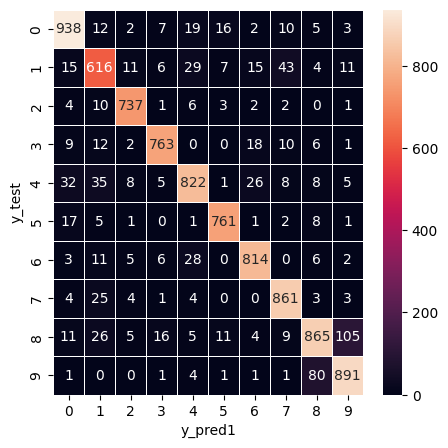

In [15]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax)
plt.xlabel("y_pred1")
plt.ylabel("y_test")
plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

In [17]:
print(cm)
print(classification_report(y_test,y_pred1,digits=4))

[[938  12   2   7  19  16   2  10   5   3]
 [ 15 616  11   6  29   7  15  43   4  11]
 [  4  10 737   1   6   3   2   2   0   1]
 [  9  12   2 763   0   0  18  10   6   1]
 [ 32  35   8   5 822   1  26   8   8   5]
 [ 17   5   1   0   1 761   1   2   8   1]
 [  3  11   5   6  28   0 814   0   6   2]
 [  4  25   4   1   4   0   0 861   3   3]
 [ 11  26   5  16   5  11   4   9 865 105]
 [  1   0   0   1   4   1   1   1  80 891]]
               precision    recall  f1-score   support

Chinhtrixahoi     0.9072    0.9250    0.9160      1014
      Doisong     0.8191    0.8137    0.8164       757
      Giaitri     0.9510    0.9621    0.9565       766
      Khoahoc     0.9467    0.9294    0.9379       821
    Kinhdoanh     0.8954    0.8653    0.8801       950
     Phapluat     0.9513    0.9548    0.9530       797
        Sohoa     0.9219    0.9303    0.9261       875
      Suckhoe     0.9101    0.9514    0.9303       905
      Thegioi     0.8782    0.8184    0.8472      1057
      Thethao     

In [18]:
# #giamchieu
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=300, random_state=42)
# svd.fit(tfidf_matrix)
# X_train_tfidf_svd = svd.transform(X_train)
# X_test_tfidf_svd = svd.transform(X_test)

In [19]:
from sklearn.svm import SVC
svclassifier = SVC()

svclassifier.fit(x_train, y_train)

In [ ]:
# import joblib

In [ ]:
# joblib.dump(svclassifier, 'model.pkl')

In [ ]:
# y_pred3 = svclassifier.predict(X_test)

In [ ]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

In [ ]:
# cm= confusion_matrix(y_test, y_pred3)
# conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

In [ ]:
# print(cm)
# print(classification_report(y_test,y_pred3,digits=4))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range 
param_grid = {'C': [ 1, 10,],  
              'gamma': [1, 0.1], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:

modelsvclassifier = SVC(C=10, gamma=1)

In [ ]:
y_pred_svc_grid = svclassifier.predict(X_test_tfidf_svd)